# Image EDA

### Performance data assesment

In [3]:
import pandas as pd
import numpy as np

performance_df = pd.read_csv('../data/Challenge_Data/performance_data.csv')
performance_df.head()

,game_id,preview_link,ER,CTR
0,bfbf7a2b7ac635e67877b1ab87fd6629,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.209269,0.058438
1,945010afbf9a55bbdffcb0895f946155,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.274552,0.074731
2,e68e20f592457b875ce29757ab855dfe,https://s3.us-east-1.amazonaws.com/a.futureadl...,0.103688,0.042228
3,adunit-nestle-purina-friskies-mob,https://s3.ap-southeast-1.amazonaws.com/a.futu...,0.136963,0.005393
4,adunit-lionsgate-uwomt-user-slider-sensory-vid...,https://s3.us-west-1.amazonaws.com/a.futureadl...,0.114208,0.016443


Engagement Rate (ER) - the number of engagements divided by the number of impressions

Click Through Rate (CTR) - the number of clicks divided by the number of engagements

Video Through Rate (VTR) - the number of videos ends divided by the number of engagements

In [8]:
performance_df.loc[5].preview_link

'https://s3.us-west-1.amazonaws.com/a.futureadlabs.com-us-west-1-backup/us-west-1/games/84327cf26d2a91e2730ae7ddbfca6d59/91e424f0eec275d6e730/index.html'

In [9]:
performance_df.describe()

,ER,CTR
count,905.000000,905.000000
mean,0.136318,0.034466
std,0.091524,0.036967
min,0.000000,0.000000
25%,0.070338,0.007926
50%,0.118624,0.024537
75%,0.190722,0.047796
max,0.524498,0.297410


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_performance(df):
    summary = df.describe()

    # Identify top performing ads based on ER and CTR
    top_er = df.sort_values(by='ER', ascending=False).head(10)
    top_ctr = df.sort_values(by='CTR', ascending=False).head(10)
    
    return top_er, top_ctr

top_er, top_ctr = analyze_performance(performance_df)
print("\nTop 10 Ads by ER:\n", top_er)
print("\nTop 10 Ads by CTR:\n", top_ctr)



Top 10 Ads by ER:
                                                game_id  \
357                   0792c911c288bd241c1e2a2b64bce488   
856                   015efcdd8de3698ffc4dad6dabd6664a   
40                    07f93a53c25007301d276ec20e7be491   
208       adunit-mouser-user-choice-flight4-uk-cpe-mob   
33                    6a3dbf08b82e45b3f3e79844f3a9aa18   
614                   0978cddd7a740a70fa0ac73fb6603aee   
233                      adunit-not-co-icecream-br-mob   
509  adunit-western-union-ralphs-sensory-eng-auto-e...   
248   adunit-mouser-user-choice-flight4-canada-cpe-mob   
782                   471b3c709ca35b4765c096beb835bcc3   

                                          preview_link        ER       CTR  
357  https://s3.eu-west-1.amazonaws.com/a.futureadl...  0.524498  0.025249  
856  https://s3.eu-west-1.amazonaws.com/a.futureadl...  0.446696  0.034950  
40   https://s3.ap-southeast-1.amazonaws.com/a.futu...  0.440421  0.020432  
208  https://s3.us-east-1.amazona

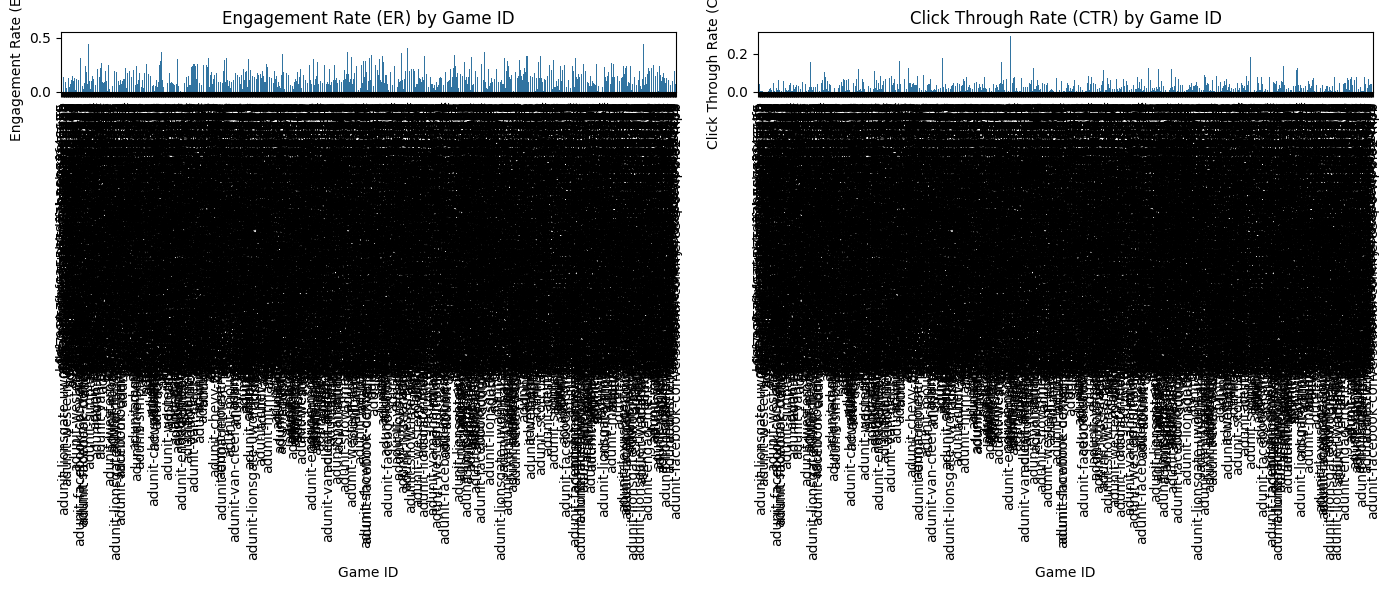

In [17]:
def plot_performance(df):
    plt.figure(figsize=(14, 6))

    # ER Plot
    plt.subplot(1, 2, 1)
    sns.barplot(x='game_id', y='ER', data=df)
    plt.xticks(rotation=90)
    plt.title('Engagement Rate (ER) by Game ID')
    plt.xlabel('Game ID')
    plt.ylabel('Engagement Rate (ER)')

    # CTR Plot
    plt.subplot(1, 2, 2)
    sns.barplot(x='game_id', y='CTR', data=df)
    plt.xticks(rotation=90)
    plt.title('Click Through Rate (CTR) by Game ID')
    plt.xlabel('Game ID')
    plt.ylabel('Click Through Rate (CTR)')

    plt.tight_layout()
    plt.show()

plot_performance(performance_df)


In [24]:
print( top_ctr.loc[161].preview_link )
print(top_ctr.loc[507].preview_link)


https://s3.ap-east-1.amazonaws.com/a.futureadlabs.com-ap-east-1-backup/ap-east-1/games/6befe54086758294b47addf0c12052a7/072b917cfdeb4bb4b7ea/index.html
https://s3.ap-east-1.amazonaws.com/a.futureadlabs.com-ap-east-1-backup/ap-east-1/games/eb641577b39bf60665e3130ac0d4e301/33d4b3bcfe16317edf88/index.html


In [18]:
selected_data = top_ctr['game_id']
selected_data

161                    6befe54086758294b47addf0c12052a7
371                    f033db746b20e747ee528caa07f0b2de
507                    eb641577b39bf60665e3130ac0d4e301
560                    79a672060e901ce418230c3959619cca
698                    77af46ea55c251a18213104bd760d1d2
894                      adunit-engagementplus-ihop-mob
70                     adunit-vodacom-ciot-curve-v1-mob
738                    c9790ca6d49dfc3f245db91d3b62c56d
248    adunit-mouser-user-choice-flight4-canada-cpe-mob
724                    c823124ca76c00a9d3b79380e5bdfd29
Name: game_id, dtype: object

In [3]:
import os

def list_filenames(directory):
    filename_list = []
    # Walk through the directory and its subdirectories
    for root, directories, files in os.walk(directory):
        for filename in files:
            filename_list.append(filename)
    return filename_list


if __name__ == "__main__":
    directory_path = "/home/temesgen_gebreabzgi/semantic_image_and_text_alignment/data/Challenge_Data/Assets/0792c911c288bd241c1e2a2b64bce488"
    filenames = list_filenames(directory_path)
    
    # Print all filenames
    for filename in filenames:
        print(filename)


game_4.png
game_2.png
game_6.png
end video.png
Layer 2.png
engagement_animation_1.png
move.png
tap.png
landing_1.jpg
game_5.png
black.png
cesar - video -end.png
ingredients-2.png
_preview.png
cta.png
logo copy.png
game_1.png
grey.jpg
game_3.png
game_8.png
game_7.png
click.png
video.mp4
Layer 1.jpg


## Image Analysis

In [3]:
image_path = "/home/temesgen_gebreabzgi/semantic_image_and_text_alignment/data/Challenge_Data/Assets/0a22f881b77f00220f2034c21a18b854/_preview.png"

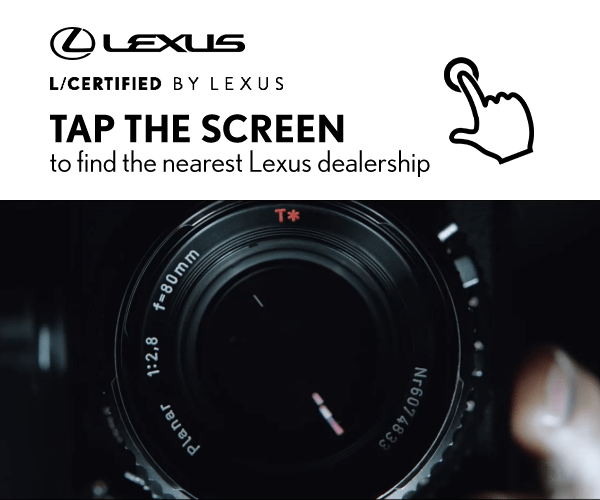

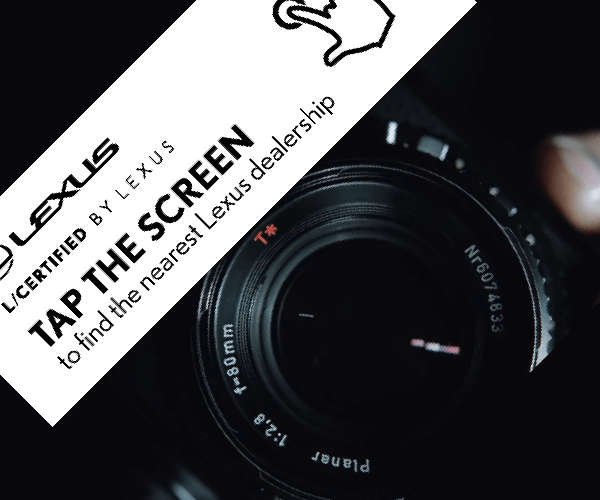

In [4]:
from PIL import Image

# Open the image
with Image.open(image_path) as im:
    # Rotate the image by 45 degrees
    im.show()
    rotated_image = im.rotate(45)
    rotated_image.show()


In [1]:
class AdFormats:
    FULL_SCREEN = (320, 480)
    MID_PAGE_UNIT = (300, 250)  


if __name__ == "__main__":
    # Accessing ad formats dimensions
    fs_width, fs_height = AdFormats.FULL_SCREEN
    mpu_width, mpu_height = AdFormats.MID_PAGE_UNIT
    
    # Print dimensions
    print(f"Full Screen Ad Format: {fs_width}x{fs_height} pixels")
    print(f"Mid-Page Unit Ad Format: {mpu_width}x{mpu_height} pixels")


Full Screen Ad Format: 320x480 pixels
Mid-Page Unit Ad Format: 300x250 pixels


In [25]:
from PIL import Image
import glob, os

source_directory = '/home/temesgen_gebreabzgi/semantic_image_and_text_alignment/data/adludio storyboard examples'
Assests_directory = '/home/temesgen_gebreabzgi/semantic_image_and_text_alignment/data/Challenge_Data/Assets/0a22f881b77f00220f2034c21a18b854' 
destination_directory = '/home/temesgen_gebreabzgi/semantic_image_and_text_alignment/images' 
#os.makedirs(destination_directory, exist_ok=True)
size = (128, 128)
pattern = os.path.join(source_directory, '*.png')

"""
for infile in glob.glob(pattern):
    file, ext = os.path.splitext(infile)
    with Image.open(infile) as im:
        im.thumbnail(size)
        im.save(file + ".thumbnail.png", "PNG")
        im.show()

        """


'\nfor infile in glob.glob(pattern):\n    file, ext = os.path.splitext(infile)\n    with Image.open(infile) as im:\n        im.thumbnail(size)\n        im.save(file + ".thumbnail.png", "PNG")\n        im.show()\n\n        '

In [9]:
# Iterate over all PNG files in the specified directory
for infile in glob.glob(pattern):
    file_name = os.path.basename(infile)  # Get just the filename without the path
    file, ext = os.path.splitext(file_name)
    with Image.open(infile) as im:
        im.thumbnail(size)
        
        save_path = os.path.join(source_directory, file + ".thumbnail.png")
        im.save(save_path, "PNG")

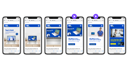

In [11]:
im.show()

In [ ]:

source_directory = '/home/temesgen_gebreabzgi/semantic_image_and_text_alignment/data/adludio storyboard examples'
Assests_directory = '/home/temesgen_gebreabzgi/semantic_image_and_text_alignment/data/Challenge_Data/Assets/0a22f881b77f00220f2034c21a18b854' 
destination_directory = '/home/temesgen_gebreabzgi/semantic_image_and_text_alignment/images' 
#os.makedirs(destination_directory, exist_ok=True)

class AdFormats:
    FULL_SCREEN = (320, 480)
    MID_PAGE_UNIT = (300, 250) 

pattern = os.path.join(source_directory, '*.png')


for infile in glob.glob(pattern):
    file, ext = os.path.splitext(infile)
    with Image.open(infile) as im:

        im.show()

# Image Analysis